In [2]:
import matplotlib

matplotlib.use('Agg')

import colorsys
import math
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont
from enum import Enum
from deephistopath.wsi import util
from deephistopath.wsi import filter
from deephistopath.wsi import slide
from deephistopath.wsi.util import Time

In [6]:
import glob
import math
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import openslide
from openslide import OpenSlideError
import os
import PIL
from PIL import Image
import re
import sys
from deephistopath.wsi import util
from deephistopath.wsi.util import Time

In [14]:
myWSI = '/Users/ckarlsen/Documents/Spiced/euclidean-eukalyptus/student-code/euclidean-eukalyptus-student-code/grad-project/data/gdc_download_20220301_141742.619853/wsi_location_test/TCGA-CM-6675-01A-01-BS1.822b3286-5d8b-4a9c-b965-430235f3422f.svs'

In [7]:
image1 = open_slide(myWSI)

In [17]:
osWSI = openslide.OpenSlide(myWSI)

In [19]:
osWSI.dimensions

(77690, 48947)

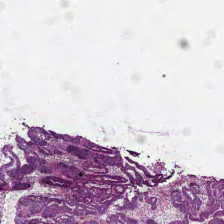

In [29]:
RGBA1 = osWSI.read_region((2500,2500),3,(224,224))
RGBA1

In [32]:
type(RGBA1)

PIL.Image.Image

In [34]:
#img_data = PIL.Image.open(RGBA1)
img_arr = np.array(RGBA1) 

In [36]:
img_arr.shape

(224, 224, 4)

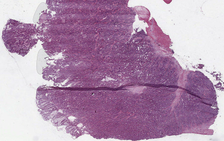

In [23]:
osWSI.get_thumbnail((224,224))

In [39]:
my_WSI = '/Users/ckarlsen/Documents/Spiced/euclidean-eukalyptus/student-code/euclidean-eukalyptus-student-code/grad-project/data/gdc_download_20220301_141742.619853/wsi_location_test/TCGA-CM-6675-01A-01-BS1.822b3286-5d8b-4a9c-b965-430235f3422f.svs'

In [46]:
def read_svs(filename):
    ''' Opens svs whole-slide image
    Args:
        filename = path/name of svs file
        
    Returns:
        An OpenSlide object of whole-slide image
         '''
    try:
        slide = openslide.open_slide(filename)
    except OpenSlideError:
        slide = None
    except FileNotFoundError:
        slide = None
    return slide

In [ ]:
def open_slide(filename):
  """
  Open a whole-slide image (*.svs, etc).

  Args:
    filename: Name of the slide file.

  Returns:
    An OpenSlide object representing a whole-slide image.
  """
  try:
    slide = openslide.open_slide(filename)
  except OpenSlideError:
    slide = None
  except FileNotFoundError:
    slide = None
  return slide

In [68]:
def get_tile(slide, slide_coordinates, level, tile_size):
    '''
    extracts a single tile from WSI according to given coordinates

    Args:
        OpenSlide WSI object

    Returns:
        PIL RGBA image
    '''
    loc1, loc2 = slide_coordinates
    tile_width, tile_height = tile_size
    tile_rgba = slide.read_region((loc1,loc2),level,(tile_width,tile_height))
    
    tile = tile_rgba.convert('RGB')
    
    return tile

In [62]:
def tile_to_array(tile):
    '''
    converts RGBA PIL image tile into numpy array

    Args:
        extracted tile

    Returns:
        numpy array
    '''
    tile_array = np.array(tile)
    return tile_array

In [72]:
colours = [ (141,141,141),
            (53,53,53),
            (189,41,153),
            (30,149,191),
            (250, 216, 206),
            (68, 172, 35),
            (204, 102, 0),
            (247, 188, 10),
            (230, 73, 22)
            ]

tissuenames = ['ADI','BACK','DEB','LYM','MUC','MUS','NORM','STR','TUM']

def tile_class_predictions(tile):
    '''
    returns class-specific RBG values for tile based on VGG19 TCModel class predictions

    Args:
        tile array of (1,224,224,3) dimensions

    Returns:
        RBG array for selected tile
    '''
    tile_yhat = TCModel.predict(tile)
    tile_RBG = np.multiply(tile_yhat, colours)
    
    return tile_RBG


In [ ]:
def tile_class_colourization():
    '''
    assigns WSI tile a RBG value based on class predictions

    Args:
        rbg colour array taken from tile_class_predictions
        tile
        WSI 

    Returns:
        softmax_outputs from Tissue_Classifier model
    '''
    pass